In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std



In [51]:
true_coef=np.array([14.3,1.39,0.12,0.39])
true_std_err=np.array([1.3,0.17,0.03,0.05])

df = pd.read_csv("3PC.csv" ) 
df1 = pd.read_csv("pulsar_analysis_results.csv" )

df2=df[['PSRJ','LUMG','B_S','EDOT']]
df3=df1[['pulsar_name','e_cut','TS']]


# Merge 2 dataframes and drop the row that has NaN value for e_cut
merged_df = pd.merge(df2, df3, left_on='PSRJ', right_on='pulsar_name', how='left')


merged_df = merged_df.drop(columns=['pulsar_name'])

merged_df = merged_df.dropna(subset=['e_cut'])

print(merged_df)

merged_df = merged_df[~merged_df['LUMG'].astype(str).str.contains('<')]

merged_df = merged_df[merged_df['TS'] > 4.0].copy()



           PSRJ                                  LUMG                 B_S  \
0    J0002+6216    9006345985678979381114569937125376   839504048319.1035   
1    J0007+7303  101228332953118134413844724347568128  10728997347901.484   
2    J0023+0923    3028784813063510601972149110439936  184067869.49802348   
3    J0030+0451     742874801556065224505124617977856   225235406.4714137   
4    J0034-0534    4381005771164998780031177601318912   97877979.31432396   
..          ...                                   ...                 ...   
289  J2256-1024    4245621824035437972090675093569536  163153268.39460778   
290  J2302+4442    3471646066794950989331275421057024  265841451.27208453   
291  J2310-0555    1620939391517236142062478110490624  115076260.77071185   
292  J2317+1439     213492799904890658983580866183168   92653863.76278442   
293  J2339-0533    5901209906994940676198210146926592  203855932.51657006   

             EDOT     e_cut           TS  
0    1.534263e+35  2.548158   20

In [53]:
# Sütunları sayısal verilere dönüştür
merged_df['LUMG'] = pd.to_numeric(merged_df['LUMG'], errors='coerce')
merged_df['B_S'] = pd.to_numeric(merged_df['B_S'], errors='coerce')
merged_df['EDOT'] = pd.to_numeric(merged_df['EDOT'], errors='coerce')
merged_df['e_cut'] = pd.to_numeric(merged_df['e_cut'], errors='coerce')

# NaN değerleri kontrol et
print(merged_df.isna().sum())

# NaN içeren satırları kaldır
merged_df = merged_df.dropna(subset=['LUMG', 'B_S', 'EDOT', 'e_cut'])

# Logaritma değerlerini hesapla
merged_df['log_LUMG'] = np.log10(merged_df['LUMG'])
merged_df['log_B_S'] = np.log10(merged_df['B_S'])
merged_df['log_EDOT'] = np.log10(merged_df['EDOT'])
merged_df['log_e_cut'] = np.log10(merged_df['e_cut'])


PSRJ     0
LUMG     0
B_S      0
EDOT     0
e_cut    0
TS       0
dtype: int64


In [55]:
Ecl=(np.array(merged_df['log_e_cut'])).reshape(-1,1)
Bstar=(np.array(merged_df['log_B_S'])).reshape(-1,1)
Epsilon_dot=(np.array(merged_df['log_EDOT'])).reshape(-1,1)
Y=(np.array(merged_df['log_LUMG'])).reshape(-1,1)


In [57]:
X=np.column_stack((Ecl,Bstar,Epsilon_dot))
X = sm.add_constant(X)
X

array([[ 1.00000000e+00,  4.06226366e-01,  1.19240228e+01,
         3.51858999e+01],
       [ 1.00000000e+00,  6.81353803e-01,  1.30305591e+01,
         3.56490994e+01],
       [ 1.00000000e+00,  4.04965092e-01,  8.26497799e+00,
         3.42011911e+01],
       [ 1.00000000e+00,  3.71157206e-01,  8.35263666e+00,
         3.35425078e+01],
       [ 1.00000000e+00,  5.58021176e-01,  7.99068499e+00,
         3.44728264e+01],
       [ 1.00000000e+00,  4.04057597e-01,  8.05070038e+00,
         3.40713802e+01],
       [ 1.00000000e+00,  5.85768536e-01,  8.27485199e+00,
         3.42378676e+01],
       [ 1.00000000e+00,  4.75884784e-01,  1.12807829e+01,
         3.44680968e+01],
       [ 1.00000000e+00,  6.14726905e-01,  1.25558412e+01,
         3.74263294e+01],
       [ 1.00000000e+00,  6.59094980e-01,  8.63221950e+00,
         3.53868859e+01],
       [ 1.00000000e+00,  1.97562125e-01,  8.32570733e+00,
         3.45772363e+01],
       [ 1.00000000e+00,  1.39063576e-01,  1.25444971e+01,
      

In [59]:
# OLS modelini oluştur ve fit et
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.28e-50
Time:                        16:05:32   Log-Likelihood:                -130.99
No. Observations:                 183   AIC:                             270.0
Df Residuals:                     179   BIC:                             282.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2624      1.678     10.285      0.0

In [61]:
obtained_coef=results.params
obtained_std_err=results.bse

print("Katsayılar (coef): ", obtained_coef)
print("Standart Hatalar (std err):", obtained_std_err)

Katsayılar (coef):  [17.26244439  1.36246732  0.12900825  0.42250373]
Standart Hatalar (std err): [1.67836372 0.18927569 0.02821102 0.05492804]


In [63]:
mse_coef = np.mean((obtained_coef - true_coef) ** 2)

print("Katsayılar için Ortalama Kare Hata (MSE):", mse_coef)

mse_std_err = np.mean((obtained_std_err - true_std_err) ** 2)

print("Ortalama Kare Hata (MSE):", mse_std_err)

Katsayılar için Ortalama Kare Hata (MSE): 2.1944931190335604
Ortalama Kare Hata (MSE): 0.03588953646218303


In [65]:
#Comparison of the manually obtained R^2 and Adj. R^2 values ​​with the results obtained from the model

R_squared = results.rsquared
adj_R_squared = results.rsquared_adj

In [67]:
y_pred = (results.fittedvalues).reshape(-1,1)
y_mean=np.mean(Y)
RSS=np.sum((Y-y_pred)**2)
TSS=np.sum((Y-y_mean)**2)


In [69]:
R_squared_manual = 1 - (RSS / TSS)

n = len(Y)  # number of observation
k = X.shape[1] - 1  # number of coefficients (exceptconstant)

adj_R_squared_manual = 1 - (1 - R_squared) * (n - 1) / (n - k - 1)


In [71]:
print(" R-Squared (R²):",R_squared)
print(" Adjusted R-Squared (Adj. R²):",adj_R_squared)

 R-Squared (R²): 0.7279857162570069
 Adjusted R-Squared (Adj. R²): 0.7234268176467892


In [73]:
if np.isclose(R_squared, R_squared_manual, atol=1e-5):
    print("R² values are matching.")
else:
    print("R² values are not matching.")

if np.isclose(adj_R_squared, adj_R_squared_manual, atol=1e-5):
    print("Adjusted R²  values are matching.")
else:
    print("Adjusted R²  values are not matching.")

R² values are matching.
Adjusted R²  values are matching.


In [89]:
# %68 (1-sigma)  calculationconfidence interval calculation
pred_summary = results.get_prediction(X).summary_frame(alpha=0.32)

pred_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34.220386,0.059028,34.161521,34.279250,33.717790,34.722981
1,34.933694,0.094884,34.839073,35.028314,34.425668,35.441719
2,33.330577,0.047534,33.283175,33.377979,32.829195,33.831959
3,33.017527,0.059341,32.958351,33.076704,32.514896,33.520159
4,33.618492,0.056287,33.562361,33.674623,33.116209,34.120774
...,...,...,...,...,...,...
178,33.488796,0.051811,33.437128,33.540463,32.986992,33.990599
179,33.195567,0.065297,33.130451,33.260683,32.692201,33.698933
180,33.109771,0.052695,33.057222,33.162320,32.607876,33.611666
181,31.711198,0.163642,31.548010,31.874387,31.186063,32.236334


In [91]:
ci_lower = pred_summary['mean_ci_lower'].values
ci_upper = pred_summary['mean_ci_upper'].values

mean = pred_summary['mean'].values

pi_lower = pred_summary['obs_ci_lower'].values
pi_upper = pred_summary['obs_ci_upper'].values


In [93]:
sorted_indices = np.argsort(y_pred.flatten())
Y_sorted=Y[sorted_indices]
Y_sorted = Y[sorted_indices]
y_pred_sorted = y_pred[sorted_indices].flatten()  # To make the y_pred one-dimensional
ci_lower_sorted = ci_lower[sorted_indices]
ci_upper_sorted = ci_upper[sorted_indices]
pi_lower_sorted = pi_lower[sorted_indices]
pi_upper_sorted = pi_upper[sorted_indices]


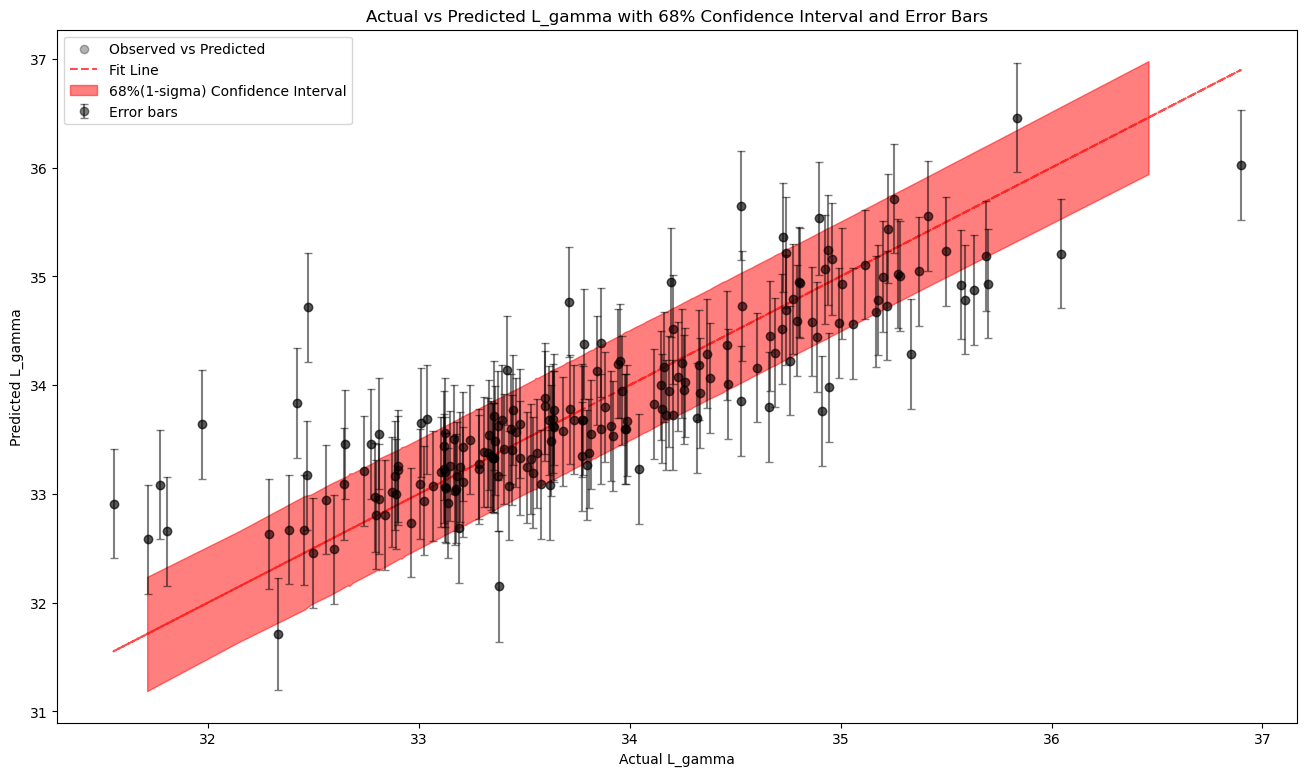

In [95]:
plt.figure(figsize=(16, 9))

plt.scatter(Y.flatten(), y_pred.flatten(), color='black', alpha=0.3, label='Observed vs Predicted')
plt.plot(Y, Y, color='red', linestyle='--', alpha=0.7, label='Fit Line')

error = ((pi_upper_sorted - pi_lower_sorted) / 2).flatten()
# Error bars plotting
plt.errorbar(Y.flatten(), y_pred.flatten(), yerr=error, fmt='o', color='black', alpha=0.5, label='Error bars', capsize=3)

# Confidence interval plotting
plt.fill_between(y_pred_sorted, pi_lower_sorted, pi_upper_sorted,
                 color='red', alpha=0.5, label='68%(1-sigma) Confidence Interval')

plt.title('Actual vs Predicted L_gamma with 68% Confidence Interval and Error Bars')
plt.xlabel('Actual L_gamma')
plt.ylabel('Predicted L_gamma')
plt.legend()

plt.show()

In [97]:
residuals = (Y - y_pred).flatten()

residuals_median = np.median(residuals)
residuals_std = np.std(residuals)


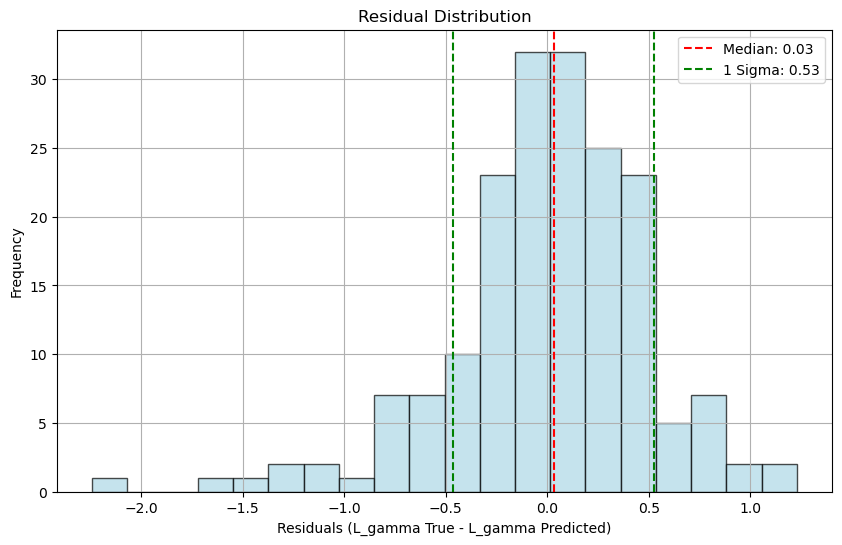

Median of Residuals: 0.03
Standard Deviation of Residuals: 0.50


In [99]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(residuals_median, color='red', linestyle='--', label=f'Median: {residuals_median:.2f}')
plt.axvline(residuals_median + residuals_std, color='green', linestyle='--', label=f'1 Sigma: {residuals_median + residuals_std:.2f}')
plt.axvline(residuals_median - residuals_std, color='green', linestyle='--')

# labeling
plt.title('Residual Distribution')
plt.xlabel('Residuals (L_gamma True - L_gamma Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Plotting histogrom of Residual Distribution
print(f'Median of Residuals: {residuals_median:.2f}')
print(f'Standard Deviation of Residuals: {residuals_std:.2f}')